In [1]:
library('RODBC')
library('quantmod')
library('PerformanceAnalytics')
library('extrafont')

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

Registering fonts with R


In [2]:
source("/usr/common/config.R")
lcon <- odbcDriverConnect(sprintf("Driver={SQL Server};Server=%s;Database=%s;Uid=%s;Pwd=%s;", ldbserver, ldbname, ldbuser, ldbpassword), case = "nochange", believeNRows = TRUE)

In [3]:
indices<-sqlQuery(lcon, "select index_name, min(time_stamp), max(time_stamp) from bhav_index group by index_name")
indices[,2]<-as.Date(indices[,2])
indices[,3]<-as.Date(indices[,3])

#print(indices)

iXts<-xts()
indexNames<-c()

##not all indices have the same start date. Make sure that the ones you select have at least 1000 days of data

for(i in 1:length(indices[,1])){
    indexName<-toString(indices[i,1])
    closingPx<-sqlQuery(lcon, sprintf("select px_close, time_stamp from bhav_index 
                                    where index_name='%s'", indexName))
    
    if(length(closingPx[,1]) < 1000)
        next
        
    iXts<-merge(iXts, dailyReturn(xts(closingPx[,1], as.Date(closingPx[,2]))))
    indexNames<-c(indexNames, indexName)
}

names(iXts)<-indexNames
#print(indexNames)

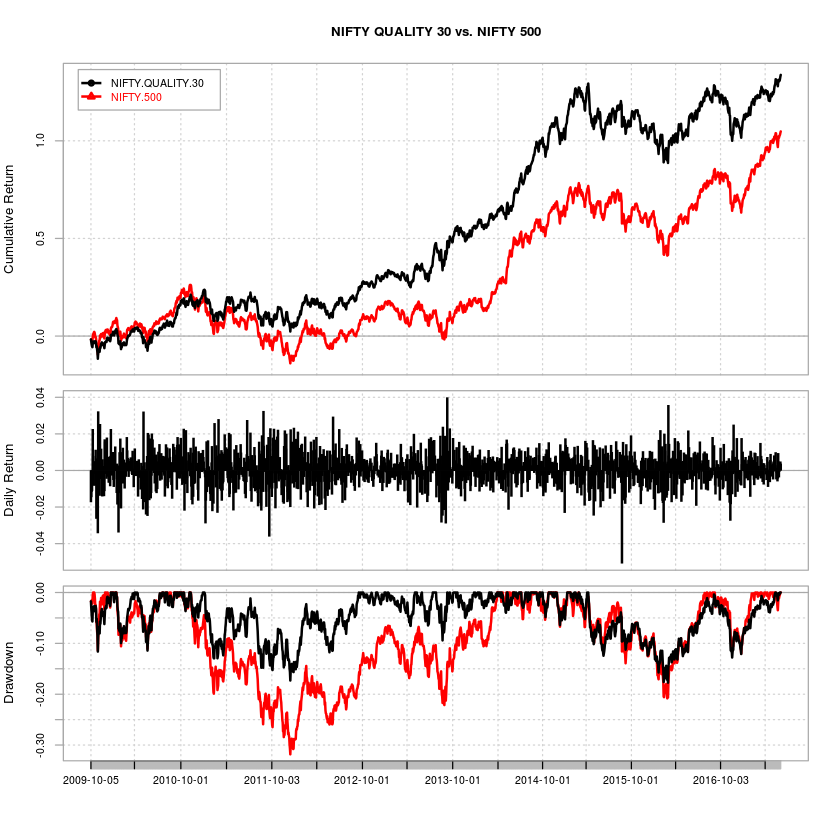

In [4]:
dailyRets<-na.omit(merge(iXts[,'NIFTY QUALITY 30'], iXts[,'NIFTY 500']))

charts.PerformanceSummary(dailyRets[-1,], main='NIFTY QUALITY 30 vs. NIFTY 500')

In [5]:
100*Return.cumulative(dailyRets[,1])
100*Return.cumulative(dailyRets[,2])

100*Return.annualized(dailyRets[,1])
100*Return.annualized(dailyRets[,2])

,NIFTY.QUALITY.30
Cumulative Return,133.76


,NIFTY.500
Cumulative Return,104.8183


,NIFTY.QUALITY.30
Annualized Return,11.88766


,NIFTY.500
Annualized Return,9.948408
